# Sophia Arackal


# Determining Trade Union Status - A Final Project

* Build a model to predict whether a person will remain in a hypothetical trade union, the United Data Scientists Union (UDSU).

# Project Details

* I am assuming that there is a major trade union for data scientists. Each member pays some dues amount to it each month and gets various benefits such as representation with employers and continuing education. 

- Your dataset will contain several features such as:

* Each ID represents a data scientist who is a current or former member. 
* Whether the person is a member of the management
* Number of months the particular data scientist has been a member of the UDSU
* Financial dues paid (each month, and in total)
* Gender of the person
* Status (still a union member; or no longer a member- LeftUnion)

# Notebook Layout

* This noteobook includes the following sections:
* Using training and test data
* Exploratory Data Analysis
* Graphical Representation the features: Violinplot, Scatterplot, Joinplot, and Pairsplot
* Data Normalization and Standardization 
* Principal Components Analysis 
* Modelling of Training Data Set Linear Regression, Decision Trees, Random Forest, Support Vector Machine
* Conclusions and what I have Learned from the Project
* Second Half of the Notebook is dedicated to the Extra Credit Project on the Test Data Set. 


## Feature Identification are Categorical and Continuous Variables:

* Continuous features:Management, MonthsInUnion, MonthlyDues 

* Categorical features: ID, gender, USACitizen, Married, ContinuingEd, FeatureA, Connectivity, FeatureC, FeatureD, FeatureE, FeatureF, FeatureG, FeatureB, DuesFrequency, PaperlessBilling, PaymentMethod, TotalDues, LeftUnion 

In [1]:
# Load libraries 
# these are the libraries I will be using in these analyses. 

import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from termcolor import colored as cl # text customization
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import statistics as st
import warnings
import nbconvert
warnings.filterwarnings('ignore')
import os  

from sklearn import tree
from IPython.display import Image
from math import log, e
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score # model precision
from sklearn.metrics import classification_report 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.svm import SVC
from sklearn.tree import plot_tree # tree diagram
from sklearn.tree import DecisionTreeClassifier # tree algorithm



rcParams['figure.figsize'] = (25, 20)

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seaborn graphs to a better style
sns.set(style="ticks", color_codes=True)

# Load Train and Test Data Sets

In [2]:
# load data sets 

train_data = pd.read_csv('Sophia -TRAIN.csv', sep=',')

test = pd.read_csv('DSCI-508-Competition-Test_Data.csv', sep=',')  

#Please remove ID before you perform PCA.
train_data =train_data.drop(['ID'], axis=1)

test = test.drop(['DS_ID'],axis=1)

# Training Data Set 

# Exploratory Data Analysis (EDA) and Data Clean up- Training Data Set

* I will conduct an EDA and data clean up training data set. I will replace NA values and remove features that don't have an impact on left union. 

In [3]:
# view shape of the dataset includes how many total columns and rows

train_data.shape

(999, 20)

In [4]:
#view the first few rows of dataframe

train_data.head(5)

,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,FeatureA,Connectivity,FeatureC,FeatureD,FeatureE,FeatureF,FeatureG,FeatureB,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues,LeftUnion
0,Female,0,No,No,7,Yes,No,DSL,Yes,No,No,No,No,Yes,One year,Yes,Electronic check,59,369,No
1,Female,0,No,No,51,Yes,No,other,Maryville,Maryville,Maryville,Maryville,Maryville,Maryville,One year,Yes,Bank transfer (automatic),20,997,No
2,Female,0,No,No,5,Yes,No,other,Maryville,Maryville,Maryville,Maryville,Maryville,Maryville,Month-to-month,No,Mailed check,20,118,No
3,Female,0,Yes,No,2,No,Maryville,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,35,69,Yes
4,Male,0,Yes,No,59,Yes,No,DSL,Yes,Yes,Yes,No,Yes,No,One year,No,Credit card (automatic),66,3958,No


In [5]:
# View the statistical analysis of dataframe

train_data.describe()

,Management,MonthsInUnion,MonthlyDues
count,999.000000,999.000000,999.00000
mean,0.166166,33.155155,81.55956
std,0.372416,39.088140,365.92737
min,0.000000,0.000000,18.00000
25%,0.000000,9.000000,41.00000
50%,0.000000,26.000000,71.00000
75%,0.000000,55.000000,90.00000
max,1.000000,637.000000,10938.00000


In [6]:
# View the dataframe

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            999 non-null    object
 1   Management        999 non-null    int64 
 2   USAcitizen        999 non-null    object
 3   Married           999 non-null    object
 4   MonthsInUnion     999 non-null    int64 
 5   ContinuingEd      999 non-null    object
 6   FeatureA          999 non-null    object
 7   Connectivity      999 non-null    object
 8   FeatureC          999 non-null    object
 9   FeatureD          999 non-null    object
 10  FeatureE          999 non-null    object
 11  FeatureF          999 non-null    object
 12  FeatureG          999 non-null    object
 13  FeatureB          999 non-null    object
 14  DuesFrequency     999 non-null    object
 15  PaperlessBilling  999 non-null    object
 16  PaymentMethod     999 non-null    object
 17  MonthlyDues     

In [7]:
#The type of the columns can be found out as follows:

train_data.dtypes

gender              object
Management           int64
USAcitizen          object
Married             object
MonthsInUnion        int64
ContinuingEd        object
FeatureA            object
Connectivity        object
FeatureC            object
FeatureD            object
FeatureE            object
FeatureF            object
FeatureG            object
FeatureB            object
DuesFrequency       object
PaperlessBilling    object
PaymentMethod       object
MonthlyDues          int64
TotalDues           object
LeftUnion           object
dtype: object

# Missing Values Detection and Features Removal in Training Data Set  

In [8]:
# To get the count of missing values of the entire dataframe. 

train_data.isnull().sum()

gender              0
Management          0
USAcitizen          0
Married             0
MonthsInUnion       0
ContinuingEd        0
FeatureA            0
Connectivity        0
FeatureC            0
FeatureD            0
FeatureE            0
FeatureF            0
FeatureG            0
FeatureB            0
DuesFrequency       0
PaperlessBilling    0
PaymentMethod       0
MonthlyDues         0
TotalDues           0
LeftUnion           0
dtype: int64

In [9]:
# Count values of each column. 
#All values are matching.

train_data.count()

gender              999
Management          999
USAcitizen          999
Married             999
MonthsInUnion       999
ContinuingEd        999
FeatureA            999
Connectivity        999
FeatureC            999
FeatureD            999
FeatureE            999
FeatureF            999
FeatureG            999
FeatureB            999
DuesFrequency       999
PaperlessBilling    999
PaymentMethod       999
MonthlyDues         999
TotalDues           999
LeftUnion           999
dtype: int64

# Identify Duplications, Converting to numerical variable,  Outlier Detection, and Features Removal in Training Data Set 

In [10]:
# check for duplicate observations 
# Conclusion: No duplicate rows were found

train_data.duplicated(keep=False)

0      False
1      False
2      False
3      False
4      False
       ...  
994    False
995    False
996    False
997    False
998    False
Length: 999, dtype: bool

In [11]:
# Verify the sample id 802 has "#VALUE!'instead of a number in Total Dues column  

x= train_data.iloc[801].values
x

array(['Female', 0, 'Yes', 'Yes', 0, 'Yes', 'No', 'Dial-in', 'Maryville',
       'Maryville', 'Maryville', 'Maryville', 'Maryville', 'Maryville',
       'Two year', 'No', 'Mailed check', 20, '#VALUE!', 'No'],
      dtype=object)

In [12]:
# Change the value of "#VALUE!" to 0 value for sample id 802
# Conclusion: I was able to verify that error has been changed.

train_data['TotalDues'] = train_data['TotalDues'].replace(['#VALUE!'], 0)
x= train_data.iloc[801].values
x

array(['Female', 0, 'Yes', 'Yes', 0, 'Yes', 'No', 'Dial-in', 'Maryville',
       'Maryville', 'Maryville', 'Maryville', 'Maryville', 'Maryville',
       'Two year', 'No', 'Mailed check', 20, 0, 'No'], dtype=object)

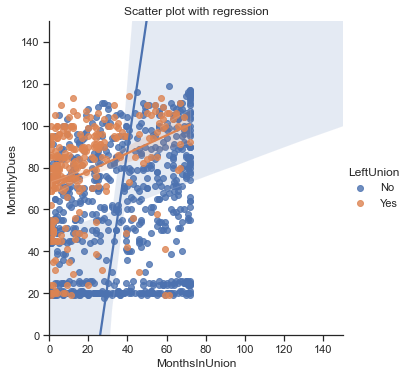

In [13]:
# plot the data using seaborn
sns.lmplot("MonthsInUnion", "MonthlyDues", train_data, hue = "LeftUnion")
# y = "MonthlyDues", hue ="LeftUnion",TotalDues
# ----------------------------------------------------------------------------------------------------
# prettify the plot

# since we are using seaborn and this library uses matplotlib behind the scenes
# you can call plt.gca (get current axes) and use all the familiar matplotlib commands
ax = plt.gca()

# change the upper limit of the plot to make it more pleasant
ax.set_xlim(0, 150)
ax.set_ylim(0, 150)

# set title
ax.set_title("Scatter plot with regression");

In [14]:
#Label encode Left Union from No and Yes to 0 and 1¶

train_data['LeftUnion'] = train_data['LeftUnion'].map({'No':0,'Yes':1})

train_data.head(5)

,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,FeatureA,Connectivity,FeatureC,FeatureD,FeatureE,FeatureF,FeatureG,FeatureB,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues,LeftUnion
0,Female,0,No,No,7,Yes,No,DSL,Yes,No,No,No,No,Yes,One year,Yes,Electronic check,59,369,0
1,Female,0,No,No,51,Yes,No,other,Maryville,Maryville,Maryville,Maryville,Maryville,Maryville,One year,Yes,Bank transfer (automatic),20,997,0
2,Female,0,No,No,5,Yes,No,other,Maryville,Maryville,Maryville,Maryville,Maryville,Maryville,Month-to-month,No,Mailed check,20,118,0
3,Female,0,Yes,No,2,No,Maryville,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,35,69,1
4,Male,0,Yes,No,59,Yes,No,DSL,Yes,Yes,Yes,No,Yes,No,One year,No,Credit card (automatic),66,3958,0


In [15]:
# Convert TotalDues object dtypes into integer and verify dtypes has been updated.
# Conclusion: TotalDues has changed into integer dtype.

train_data['TotalDues'] = train_data.TotalDues.astype(np.int64)
train_data.dtypes


gender              object
Management           int64
USAcitizen          object
Married             object
MonthsInUnion        int64
ContinuingEd        object
FeatureA            object
Connectivity        object
FeatureC            object
FeatureD            object
FeatureE            object
FeatureF            object
FeatureG            object
FeatureB            object
DuesFrequency       object
PaperlessBilling    object
PaymentMethod       object
MonthlyDues          int64
TotalDues            int64
LeftUnion            int64
dtype: object

In [16]:
# View the columns names

train_data.columns

Index(['gender', 'Management', 'USAcitizen', 'Married', 'MonthsInUnion',
       'ContinuingEd', 'FeatureA', 'Connectivity', 'FeatureC', 'FeatureD',
       'FeatureE', 'FeatureF', 'FeatureG', 'FeatureB', 'DuesFrequency',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyDues', 'TotalDues',
       'LeftUnion'],
      dtype='object')

In [17]:
# view statistical analysis of dataframe including TotalDues

train_data.describe()

,Management,MonthsInUnion,MonthlyDues,TotalDues,LeftUnion
count,999.000000,999.000000,999.00000,999.000000,999.000000
mean,0.166166,33.155155,81.55956,2173.713714,0.285285
std,0.372416,39.088140,365.92737,2191.806828,0.451776
min,0.000000,0.000000,18.00000,0.000000,0.000000
25%,0.000000,9.000000,41.00000,407.500000,0.000000
50%,0.000000,26.000000,71.00000,1383.000000,0.000000
75%,0.000000,55.000000,90.00000,3342.500000,1.000000
max,1.000000,637.000000,10938.00000,8497.000000,1.000000


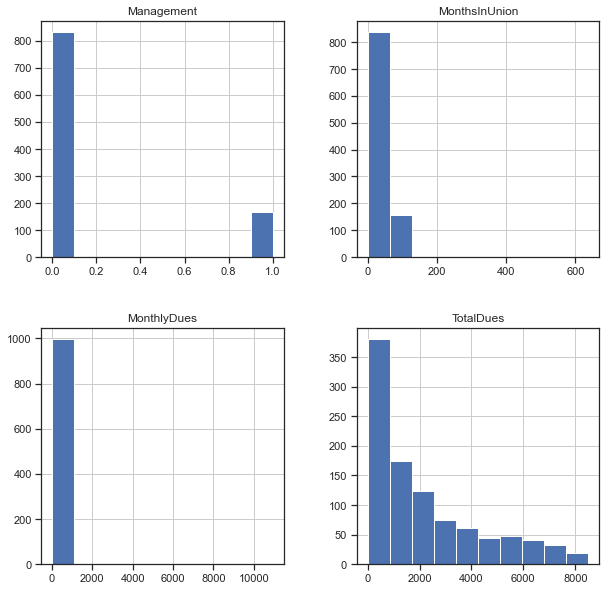

In [18]:
# View the plots of numerical variables including TotalDues

plt.rcParams['figure.figsize']= (10,10) 

train_data[['Management','MonthsInUnion', 'MonthlyDues','TotalDues']].hist();

<AxesSubplot:>

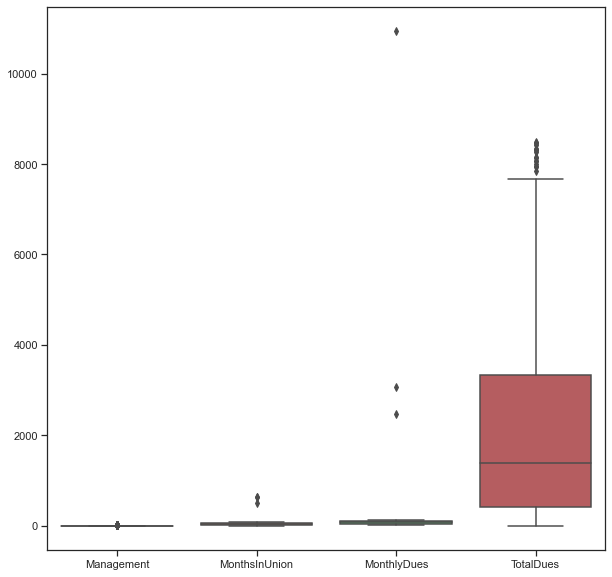

In [19]:
# View the outliers of the numerical variables in a boxplot 
# Let's check outliers presence using boxplots
# Conclusions: The boxblot shows the presence of outliers to numerical variables.

sns.boxplot(data = train_data[['Management','MonthsInUnion', 'MonthlyDues','TotalDues']])


## Remove the outliers in the Training Data Set

In [20]:
train_data1 = train_data

In [21]:
#Drop outliers for MonthlyDues. I didn't remove any others because it removes too many rows and affects the accuracy.

train_data1 = train_data1[(train_data1['MonthlyDues']< 500) & (train_data1['TotalDues']< 6700)]
train_data1.shape   


(938, 20)

In [22]:
train_data1.head()

,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,FeatureA,Connectivity,FeatureC,FeatureD,FeatureE,FeatureF,FeatureG,FeatureB,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues,LeftUnion
0,Female,0,No,No,7,Yes,No,DSL,Yes,No,No,No,No,Yes,One year,Yes,Electronic check,59,369,0
1,Female,0,No,No,51,Yes,No,other,Maryville,Maryville,Maryville,Maryville,Maryville,Maryville,One year,Yes,Bank transfer (automatic),20,997,0
2,Female,0,No,No,5,Yes,No,other,Maryville,Maryville,Maryville,Maryville,Maryville,Maryville,Month-to-month,No,Mailed check,20,118,0
3,Female,0,Yes,No,2,No,Maryville,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,35,69,1
4,Male,0,Yes,No,59,Yes,No,DSL,Yes,Yes,Yes,No,Yes,No,One year,No,Credit card (automatic),66,3958,0


In [23]:
train_data1.shape

(938, 20)

<AxesSubplot:>

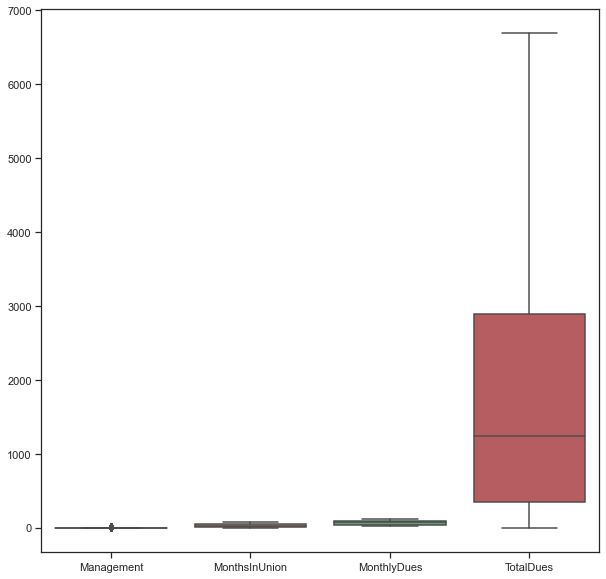

In [24]:
# View the outliers of the numerical variables in a boxplot 
# Let's check outliers presence using boxplots
# Conclusions: The boxblot shows the removal of outliers to numerical variables.

sns.boxplot(data = train_data1[['Management','MonthsInUnion', 'MonthlyDues','TotalDues']])


In [25]:
#let us find out the number of employees who left the union and those who didn’t

train_data1['LeftUnion'].value_counts()

0    659
1    279
Name: LeftUnion, dtype: int64

In [26]:
#Let us get a sense of the numbers across these two classes:

train_data1.groupby('LeftUnion').mean()

,Management,MonthsInUnion,MonthlyDues,TotalDues
LeftUnion,,,,
0,0.118361,34.280728,56.693475,2022.837633
1,0.261649,16.985663,76.838710,1434.487455


In [27]:
#to find the correlation among the columns

train_data1.corr(method ='pearson') 

,Management,MonthsInUnion,MonthlyDues,TotalDues,LeftUnion
Management,1.000000,-0.040881,0.255609,0.088447,0.178229
MonthsInUnion,-0.040881,1.000000,0.035480,0.787520,-0.343244
MonthlyDues,0.255609,0.035480,1.000000,0.529981,0.322073
TotalDues,0.088447,0.787520,0.529981,1.000000,-0.149160
LeftUnion,0.178229,-0.343244,0.322073,-0.149160,1.000000


# Graphical Representations the features: Violinplot, Scatterplot, Joinplot, and Pairsplot

* The plots will help visualize the data and see if there are anyy relationships between the features. 

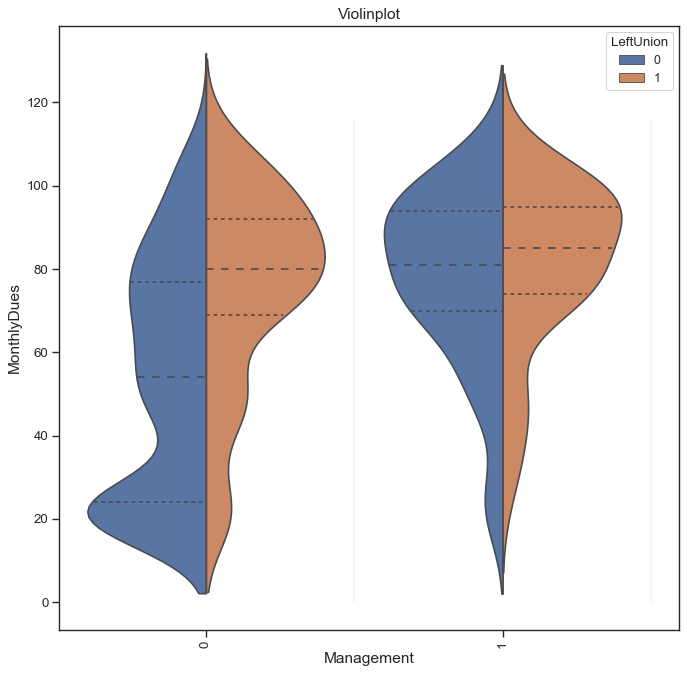

In [28]:
# Violinplot 
#Displays distribution of data based on Management and MonthlyDues  
# Conclusion: It agrees with my previous analysis above in which there are more members left the union. 


# instanciate the figure
plt.figure(figsize = (10, 10), dpi= 80)
sns.violinplot(x = "Management", 
               y = "MonthlyDues", hue ="LeftUnion", 
               data = train_data1, split = True,
               scale = 'width', 
               inner = 'quartile'
              )
# prettify the plot

# get the current figure
ax = plt.gca()
# get the xticks to iterate over
xticks = ax.get_xticks()

# iterate over every xtick and add a vertical line
# to separate different classes
for tick in xticks:
    ax.vlines(tick + 0.5, 0, np.max(train_data1["MonthlyDues"]), color = "grey", alpha = .1)
    
# rotate the x and y ticks
ax.tick_params(axis = 'x', labelrotation = 90, labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)

# add x and y label
ax.set_xlabel("Management", fontsize = 14)
ax.set_ylabel("MonthlyDues", fontsize = 14)

# set title
ax.set_title("Violinplot", fontsize = 14);

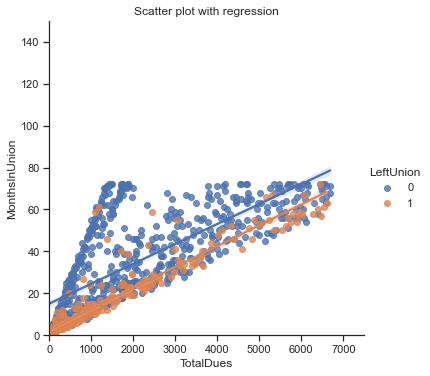

In [29]:
# Scatter Plot
#Conclusion: This figure shows a scatter plot for two variables that have a strongly positive linear relationship between them. 
#The correlation between X and Y equals 0.8 based on my calculation above. The LeftUnion lines are positive but harder to determine how strong relationship is.


# plot the data using seaborn
sns.lmplot("TotalDues", "MonthsInUnion", train_data1, hue = "LeftUnion")
# y = "MonthlyDues", hue ="LeftUnion",TotalDues
# ----------------------------------------------------------------------------------------------------
# prettify the plot

# since we are using seaborn and this library uses matplotlib behind the scenes
# you can call plt.gca (get current axes) and use all the familiar matplotlib commands
ax = plt.gca()

# change the upper limit of the plot to make it more pleasant
ax.set_xlim(0, 7500)
ax.set_ylim(0, 150)

# set title
ax.set_title("Scatter plot with regression");

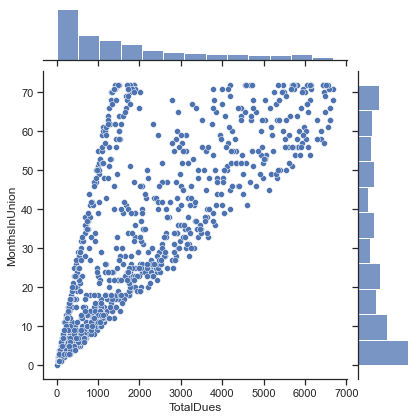

In [30]:
#Joinplot - Bivariate plots between key feature
# It is used to draw a plot of two variables with bivariate and univariate graphs. It basically combines two different plots.
# Conclusion: It shows that MonthsInUnion on the y axis and TotalDues on the x axis have a linear relationship between the two that suggests that the total dues increases with the MonthsInUnion.

sns.jointplot(x ='TotalDues', y ='MonthsInUnion', data = train_data1) 


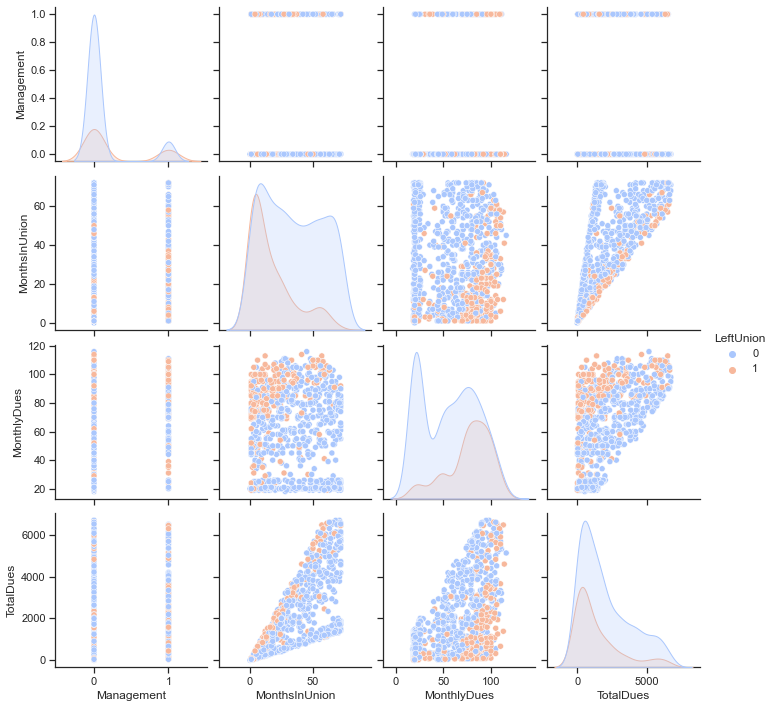

In [31]:
#Pairplot
# These plots represents pairwise relation across the entire dataframe. The pairplot supports an additional argument called hue for categorical separation os the UnionLeft target variable. 
#Conclusion: It shows that there is not a distinct separation of Left Union Yes and No within the different features. 

sns.pairplot(train_data1, hue ="LeftUnion", palette ='coolwarm') 


# Data Normalization and Standardization - Training Data Set

* After cleaning the traning data set, I am ready to normalize and standardize the data set so I can prepare data set for PCA.

In [32]:
train_data_num = train_data1[['MonthsInUnion','MonthlyDues','TotalDues']]
train_data_cat = train_data1[['Management','gender', 'USAcitizen', 'Married','ContinuingEd', 'FeatureA', 'Connectivity', 'FeatureC', 
                             'FeatureD','FeatureE', 'FeatureF', 'FeatureG', 'FeatureB', 'DuesFrequency','PaperlessBilling',
                             'PaymentMethod']]
y1 = train_data1[['LeftUnion']]

print("Numerical Feature  Shape:     "+ str(train_data_num.shape))
print("Categorical Feature  Shape:   "+ str(train_data_cat.shape))
print("Target Feature Shape:         "+ str(y1.shape))

Numerical Feature  Shape:     (999, 3)
Categorical Feature  Shape:   (999, 16)
Target Feature Shape:         (999, 1)


In [33]:
# View the first few rows of dataframe

train_data_cat.head()

,Management,gender,USAcitizen,Married,ContinuingEd,FeatureA,Connectivity,FeatureC,FeatureD,FeatureE,FeatureF,FeatureG,FeatureB,DuesFrequency,PaperlessBilling,PaymentMethod
0,0,Female,No,No,Yes,No,DSL,Yes,No,No,No,No,Yes,One year,Yes,Electronic check
1,0,Female,No,No,Yes,No,other,Maryville,Maryville,Maryville,Maryville,Maryville,Maryville,One year,Yes,Bank transfer (automatic)
2,0,Female,No,No,Yes,No,other,Maryville,Maryville,Maryville,Maryville,Maryville,Maryville,Month-to-month,No,Mailed check
3,0,Female,Yes,No,No,Maryville,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check
4,0,Male,Yes,No,Yes,No,DSL,Yes,Yes,Yes,No,Yes,No,One year,No,Credit card (automatic)


In [34]:
# I am using the get_dummies for data manipulation in order to convert categorical data into dummy or indicator variables.
#View the first few rows of dataframe

train_data_enc = pd.get_dummies(train_data_cat)
train_data_enc.head()

,Management,gender_Female,gender_Male,USAcitizen_No,USAcitizen_Yes,Married_No,Married_Yes,ContinuingEd_No,ContinuingEd_Yes,FeatureA_Maryville,...,FeatureB_Yes,DuesFrequency_Month-to-month,DuesFrequency_One year,DuesFrequency_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,0,0,1,0,...,1,0,1,0,0,1,0,0,1,0
1,0,1,0,1,0,1,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0
2,0,1,0,1,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
3,0,1,0,0,1,1,0,1,0,1,...,1,1,0,0,0,1,0,0,1,0
4,0,0,1,0,1,1,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0


In [35]:
# Place the variable into a new dataframe

train_data_enc = pd.DataFrame(train_data_enc)

In [36]:
#View new dataframe
train_data_enc.shape

(999, 43)

In [37]:
# To standardize the data values into a standard format

train_data_num2 = StandardScaler().fit_transform(train_data_num)

print("Encoded Feature Array Shape: " + str(train_data_num.shape))

#Let's check the mean and standard deviation - we expect this to be close to 0 & 1, respectively.
print(np.mean(train_data_num2),np.std(train_data_num2))


Encoded Feature Array Shape: (999, 3)
-3.0821006222493503e-17 0.9999999999999998


In [38]:
# Place the variable into a new dataframe

train_data_num3 = pd.DataFrame(train_data_num2)

In [39]:
# View the new dataframe

train_data_num3

,0,1,2
0,-0.669468,-0.061681,-0.823803
1,0.456757,-0.168313,-0.537138
2,-0.720660,-0.168313,-0.938378
3,-0.797448,-0.127301,-0.960745
4,0.661525,-0.042542,0.814479
...,...,...,...
994,0.763909,-0.061681,0.607240
995,-0.567084,-0.099959,-0.767657
996,0.968677,-0.004264,1.592309
997,-0.746256,0.050419,-0.790024


In [40]:
# Rename the columns to feature names

train_data_num3 = train_data_num3.rename(columns = {train_data_num3.columns[0]:'MonthsInUnion',
                                 train_data_num3.columns[1]:'MonthlyDues',
                                 train_data_num3.columns[2]:'TotalDues'})
                                  
                                  



In [41]:
train_data_num3.shape

(999, 3)

In [42]:
# Let's combine the numerical and categorical datasets and used inner join to keep the dtypes the same as before

norm_train_data = pd.concat([train_data_num3, train_data_enc], axis=1, join='inner')

print("Feature Shape: " + str(norm_train_data.shape))

Feature Shape: (999, 46)


In [43]:
# View the first few rows of dataframe

norm_train_data.head()

,MonthsInUnion,MonthlyDues,TotalDues,Management,gender_Female,gender_Male,USAcitizen_No,USAcitizen_Yes,Married_No,Married_Yes,...,FeatureB_Yes,DuesFrequency_Month-to-month,DuesFrequency_One year,DuesFrequency_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.669468,-0.061681,-0.823803,0,1,0,1,0,1,0,...,1,0,1,0,0,1,0,0,1,0
1,0.456757,-0.168313,-0.537138,0,1,0,1,0,1,0,...,0,0,1,0,0,1,1,0,0,0
2,-0.720660,-0.168313,-0.938378,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
3,-0.797448,-0.127301,-0.960745,0,1,0,0,1,1,0,...,1,1,0,0,0,1,0,0,1,0
4,0.661525,-0.042542,0.814479,0,0,1,0,1,1,0,...,0,0,1,0,1,0,0,1,0,0


In [44]:
norm_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   MonthsInUnion                            999 non-null    float64
 1   MonthlyDues                              999 non-null    float64
 2   TotalDues                                999 non-null    float64
 3   Management                               999 non-null    int64  
 4   gender_Female                            999 non-null    uint8  
 5   gender_Male                              999 non-null    uint8  
 6   USAcitizen_No                            999 non-null    uint8  
 7   USAcitizen_Yes                           999 non-null    uint8  
 8   Married_No                               999 non-null    uint8  
 9   Married_Yes                              999 non-null    uint8  
 10  ContinuingEd_No                          999 non-n

# Principal Components Analysis - Train Data Set
* PCA is an unsupervised dimensionality reduction and visualisation technique. It will reduce the number of features. I will apply the PCA function to the training data set for analysis.

In [45]:
pca = PCA(n_components=6)
principalComponents_train_data = pca.fit_transform(norm_train_data)

In [46]:
print(principalComponents_train_data.shape)

(999, 6)


In [47]:
principalComponents_train_data_Df = pd.DataFrame(data = principalComponents_train_data
             , columns = ['p_c_1', 'p_c_2','p_c_3','p_c_4','p_c_5','p_c_6'])
principalComponents_train_data_Df.head()

,p_c_1,p_c_2,p_c_3,p_c_4,p_c_5,p_c_6
0,-0.850271,-0.994798,0.269895,0.370083,-0.537318,0.924848
1,-1.240219,2.140649,0.113274,-0.904895,-0.638102,0.560285
2,-2.434163,1.751751,0.048030,-0.675057,-0.563573,0.625291
3,-0.872217,-1.510826,0.270473,0.434524,0.440771,1.222958
4,1.225752,0.482960,-0.556803,1.322070,-0.323740,-0.501042


In [48]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.20144543 0.17370444 0.10900805 0.06689235 0.04632073 0.04403663]


In [49]:
np.sum(np.array([0.20144543, 0.17370445, 0.10900801, 0.06689148, 0.04632014, 0.04405597]))

0.6414254800000001

## Screeplot of PCA

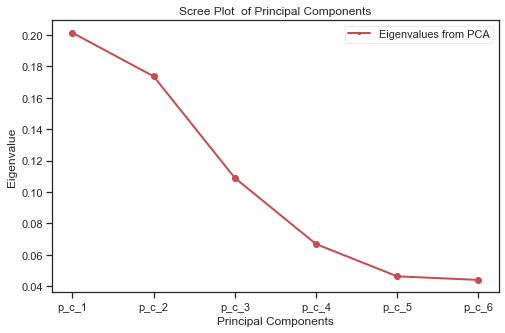

In [50]:
fig = plt.figure(figsize=(8,5))
plt.plot(principalComponents_train_data_Df.columns, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalue') 
plt.title('Scree Plot  of Principal Components')
leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3, 
                 shadow=False,markerscale=0.4)
leg.get_frame().set_alpha(0.4)
plt.show()

In [51]:
# If you look at the output, you will notice that variables #19, 22, 25, 28, 31, and 34 have 
# identical principal components. (This list could be slightly different for you, depending on your data and
# position of the variables)

# Remove all but one (keep any one of them) from the norm_train_data
# Now, we have identified and removed correlated variables.

df_comp = pd.DataFrame(pca.components_,index=list(['component 0', 'component 1', 'component 2',
                                                  'component 3','component 4', 'component 5']))
components = df_comp.sort_values(by ='component 0', axis=1,ascending=False).round(decimals=6)
components
components.transpose()

,component 0,component 1,component 2,component 3,component 4,component 5
2,0.581416,0.032410,-0.307869,-0.093194,-0.031232,-0.121148
0,0.453110,0.359649,0.332470,0.085007,-0.028309,-0.010016
1,0.260958,0.144679,0.752765,0.018545,0.062980,0.069041
33,0.175630,-0.080496,-0.073688,-0.130161,-0.016754,0.088417
36,0.173642,-0.077328,-0.101365,-0.160026,-0.076232,0.083288
24,0.161504,-0.034565,-0.074738,0.040246,-0.087316,-0.025346
27,0.158791,-0.039096,-0.111085,-0.020727,-0.149331,0.036332
14,0.155641,-0.024558,-0.059494,-0.204321,0.001396,-0.060370
21,0.121780,-0.010018,-0.100258,0.225716,-0.105546,0.055640
30,0.114308,-0.011681,-0.096045,0.176500,-0.171715,0.049705


In [52]:
##Exclude: 19, 22, 25, 28, 31, and 34
# In the next step we will remove all but one

norm_train_data.iloc[:, [19, 22, 25, 28, 31,34]].head()

,FeatureC_Maryville,FeatureD_Maryville,FeatureE_Maryville,FeatureF_Maryville,FeatureG_Maryville,FeatureB_Maryville
0,0,0,0,0,0,0
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [53]:
X_train_final = norm_train_data

In [54]:
#Let's drop the correlated variables based on the values above where they are negative and the same numbers. It is not necessary to keep them all.

# The dataframe (X_train_final) created below is going to be my final predictors.
#Recall, your target variable is: y1 = train_data[['LeftUnion']]

X_train_final = norm_train_data.drop(['FeatureC_Maryville',
                                      'FeatureD_Maryville',
                                      'FeatureE_Maryville',
                                      'FeatureF_Maryville',
                                      'FeatureG_Maryville'], axis = 1)
X_train_final.head()

,MonthsInUnion,MonthlyDues,TotalDues,Management,gender_Female,gender_Male,USAcitizen_No,USAcitizen_Yes,Married_No,Married_Yes,...,FeatureB_Yes,DuesFrequency_Month-to-month,DuesFrequency_One year,DuesFrequency_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.669468,-0.061681,-0.823803,0,1,0,1,0,1,0,...,1,0,1,0,0,1,0,0,1,0
1,0.456757,-0.168313,-0.537138,0,1,0,1,0,1,0,...,0,0,1,0,0,1,1,0,0,0
2,-0.720660,-0.168313,-0.938378,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
3,-0.797448,-0.127301,-0.960745,0,1,0,0,1,1,0,...,1,1,0,0,0,1,0,0,1,0
4,0.661525,-0.042542,0.814479,0,0,1,0,1,1,0,...,0,0,1,0,1,0,0,1,0,0


## Correlation and HeatMap of Training Data Set 

In [55]:
# The correlation matrix values for train data set.
# these values are ideal for the plot shown in next line. 

print(X_train_final.corr()) 
correlation_matrix = X_train_final.corr().round(2)
  


                                         MonthsInUnion  MonthlyDues  \
MonthsInUnion                                 1.000000     0.593672   
MonthlyDues                                   0.593672     1.000000   
TotalDues                                     0.494557     0.060795   
Management                                   -0.027241     0.000067   
gender_Female                                 0.003037    -0.013194   
gender_Male                                  -0.003037     0.013194   
USAcitizen_No                                -0.205993     0.035642   
USAcitizen_Yes                                0.205993    -0.035642   
Married_No                                   -0.089900     0.033777   
Married_Yes                                   0.089900    -0.033777   
ContinuingEd_No                              -0.001950    -0.032435   
ContinuingEd_Yes                              0.001950     0.032435   
FeatureA_Maryville                           -0.001950    -0.032435   
Featur

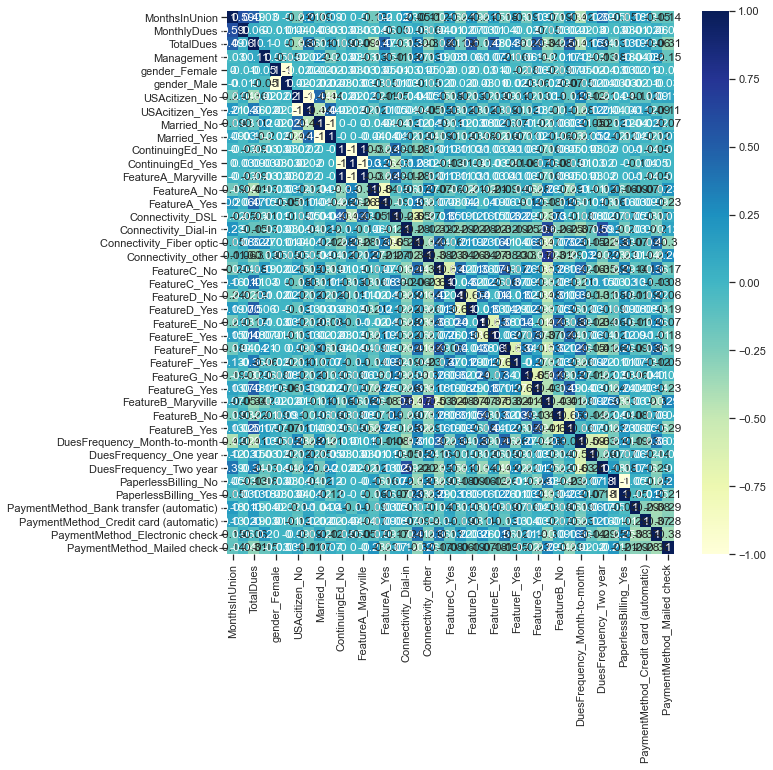

In [56]:
# plotting correlation heatmap 
dataplot = sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True) 
  
# displaying heatmap 
plt.show() 

#how to interpret the data
#Correlation summarizes the strength and direction of the linear (straight-line) association between two quantitative variables. Denoted by r, it takes values between -1 and +1. A positive value for r indicates a positive association, and a negative value for r indicates a negative association.
#The closer r is to 1 the closer the data points fall to a straight line, thus, the linear association is stronger. The closer r is to 0, making the linear association weaker.
#Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. The diagonals are all 1/dark green because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color the higher the correlation between the two variables. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.


# Create a Training and Test Sets for Modelling- Train Test Split¶
** Split my training data into a training set and a testing set.**


In [57]:
X_train_final.shape, y1.shape

((999, 41), (999, 1))

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
# Separate target from potential predictors 
# Split data into training and testing sets

X = X_train_final
y = y1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y1)


In [60]:
# View the shape of the sets

X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((999, 41), (999, 1), (699, 41), (699, 1), (300, 41), (300, 1))

# Modelling of Training Data Set

* The reason I have chosen the different models to test my data. Each model has their pros and cons for how well they can handle large data sets. 
* Logistic Regression-is one of the simplest predictive algorithms. It can give the direction each feature affects the response value – either positively or negatively.
* Decision Tree- it does not require normalize or scaling the data or remove the missing values and output is easy to understand. 
* Random Forest - It can solve both type of problems that is classification and regression problems. It can handle large data sets with higher dimensionality. It has an effective method for estimating missing data and maintains accuracy when missing data is present. 
* SVM - It works relatively well when there is a clear margin of separation between classes.SVM is more effective in high dimensional spaces which is what the training data is. SVM is effective in cases where the number of dimensions is greater than the number of samples.
* Linear Regression - I chose it becuase it is a simple model. 


# Logistic Regression Model

In [61]:
# Importing the logistic regression class and fitting the model
from sklearn.linear_model import LogisticRegression
lrmodel=LogisticRegression()
lrmodel.fit(X_train, y_train)

LogisticRegression()

In [62]:
# Using the fitted model to predict using the test data from the training data
y_pred=lrmodel.predict(X_test)
y_pred



array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0], d

In [63]:
# Calculation different statistics to evaluate model fit
from sklearn import metrics
print("Logistic_Regression_M Accuracy:", round(metrics.accuracy_score(y_test, y_pred),4))
print("Precision score:", np.round(metrics.precision_score(y_test, y_pred),4))
print("Recall score:", np.round(metrics.recall_score(y_test, y_pred ),4))
print("Coefficients:", np.round(lrmodel.coef_,4))



Logistic_Regression_M Accuracy: 0.8067
Precision score: 0.7
Recall score: 0.5698
Coefficients: [[-1.1627  0.0977 -0.29    0.1487 -0.1437  0.1435 -0.1367  0.1365  0.0925
  -0.0927  0.1013 -0.1014  0.1013 -0.2821  0.1806 -0.4094 -0.0499  0.6887
  -0.2296  0.1888  0.0905 -0.0145  0.2939  0.026   0.2534  0.4367 -0.1574
   0.035   0.2443 -0.2795 -0.1688  0.4482  0.783  -0.1356 -0.6476 -0.1712
   0.171  -0.0538 -0.0669  0.2189 -0.0984]]


In [64]:
# Creating confusion matrix to check the accuracy of prediction
# Conclusion: True Positives 193, False Positives 21, False Negatives 37, and True Negatives is 49 

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
conf_matrix

array([[193,  21],
       [ 37,  49]], dtype=int64)

In [65]:
# Detailed classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.84      0.90      0.87       214
           1       0.70      0.57      0.63        86

    accuracy                           0.81       300
   macro avg       0.77      0.74      0.75       300
weighted avg       0.80      0.81      0.80       300



# Decision Tree Model


In [66]:
# We are now ready to train our Decision Tree classifier using gini
clf=tree.DecisionTreeClassifier(max_leaf_nodes=None, criterion='gini', random_state=1) # gini is actually the default method
clf=clf.fit(X_train, y_train)



In [67]:
predictions = clf.predict(X_test)
predictions



array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0], d

In [68]:
# Accuracy Score of Model

dtaccuracy = accuracy_score(y_test, predictions)
dtaccuracy
print(cl('Decision_Trees_M Accuracy of the model is {:.0%}'.format(dtaccuracy)))


Decision_Trees_M Accuracy of the model is 73%


In [69]:
# Making the Confusion Matrix (How many incorrect predictions in #the model)
# Conclusion: True Positives 179, False Positives 35, False Negatives 46, and True Negatives is 40 

from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, predictions)
cm1



array([[179,  35],
       [ 46,  40]], dtype=int64)

In [70]:
# Detailed classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.80      0.84      0.82       214
           1       0.53      0.47      0.50        86

    accuracy                           0.73       300
   macro avg       0.66      0.65      0.66       300
weighted avg       0.72      0.73      0.72       300



# Random Forest Model


In [71]:
X_train.columns

Index(['MonthsInUnion', 'MonthlyDues', 'TotalDues', 'Management',
       'gender_Female', 'gender_Male', 'USAcitizen_No', 'USAcitizen_Yes',
       'Married_No', 'Married_Yes', 'ContinuingEd_No', 'ContinuingEd_Yes',
       'FeatureA_Maryville', 'FeatureA_No', 'FeatureA_Yes', 'Connectivity_DSL',
       'Connectivity_Dial-in', 'Connectivity_Fiber optic',
       'Connectivity_other', 'FeatureC_No', 'FeatureC_Yes', 'FeatureD_No',
       'FeatureD_Yes', 'FeatureE_No', 'FeatureE_Yes', 'FeatureF_No',
       'FeatureF_Yes', 'FeatureG_No', 'FeatureG_Yes', 'FeatureB_Maryville',
       'FeatureB_No', 'FeatureB_Yes', 'DuesFrequency_Month-to-month',
       'DuesFrequency_One year', 'DuesFrequency_Two year',
       'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [72]:
# Create a list of feature names
feat_labels = ['MonthsInUnion', 'MonthlyDues', 'TotalDues', 'Management',
       'gender_Female', 'gender_Male', 'USAcitizen_No', 'USAcitizen_Yes',
       'Married_No', 'Married_Yes', 'ContinuingEd_No', 'ContinuingEd_Yes',
       'FeatureA_Maryville', 'FeatureA_No', 'FeatureA_Yes', 'Connectivity_DSL',
       'Connectivity_Dial-in', 'Connectivity_Fiber optic',
       'Connectivity_other', 'FeatureC_No', 'FeatureC_Yes', 'FeatureD_No',
       'FeatureD_Yes', 'FeatureE_No', 'FeatureE_Yes', 'FeatureF_No',
       'FeatureF_Yes', 'FeatureG_No', 'FeatureG_Yes', 'FeatureB_Maryville',
       'FeatureB_No', 'FeatureB_Yes', 'DuesFrequency_Month-to-month',
       'DuesFrequency_One year', 'DuesFrequency_Two year',
       'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']





In [73]:
# Create a random forest classifier
rfclf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

# Train the classifier
rfclf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, rfclf.feature_importances_):
    print(feature)


('MonthsInUnion', 0.13448075971870677)
('MonthlyDues', 0.10709560167873766)
('TotalDues', 0.12589022360169486)
('Management', 0.024062486855407246)
('gender_Female', 0.019192637298977223)
('gender_Male', 0.018968413841023966)
('USAcitizen_No', 0.015417847667582836)
('USAcitizen_Yes', 0.015485252888114802)
('Married_No', 0.012165434845269638)
('Married_Yes', 0.012526511698435)
('ContinuingEd_No', 0.0039033728682465667)
('ContinuingEd_Yes', 0.003999470583897882)
('FeatureA_Maryville', 0.0039679097746400036)
('FeatureA_No', 0.017030449767212994)
('FeatureA_Yes', 0.0161117929654357)
('Connectivity_DSL', 0.014316633932757167)
('Connectivity_Dial-in', 0.000868914767246432)
('Connectivity_Fiber optic', 0.0423778625838514)
('Connectivity_other', 0.002947498985679698)
('FeatureC_No', 0.03024763708709206)
('FeatureC_Yes', 0.012245544160688567)
('FeatureD_No', 0.01718083468706533)
('FeatureD_Yes', 0.015669562741623292)
('FeatureE_No', 0.015839942930924285)
('FeatureE_Yes', 0.013532926079240266)
(

In [74]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.02
# Conclusion: Only the first 9 features have a high value based on this threhold. 

sfm = SelectFromModel(rfclf, threshold=0.02)

# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=1000, n_jobs=-1,
                                                 random_state=0),
                threshold=0.02)

## Identify and select the most important features

In [75]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

MonthsInUnion
MonthlyDues
TotalDues
Management
Connectivity_Fiber optic
FeatureC_No
FeatureF_No
DuesFrequency_Month-to-month
PaymentMethod_Electronic check


## Start over with a new dataset that contains only the most important features

In [76]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)



In [77]:
# Create a new random forest classifier for the most important features
rfclf_important = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)



In [78]:
# Train the new classifier on the new dataset containing the most important features
rfclf_important.fit(X_important_train, y_train)



RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)

In [79]:
# Apply The Full Featured Classifier To The Test Data
y_pred = rfclf.predict(X_test)

# View The Accuracy Of Our Full Feature (4 Features) Model
accuracy_score(y_test, y_pred)

print("Random_Forest_M Accuracy:", round(metrics.accuracy_score(y_test, y_pred),4))

Random_Forest_M Accuracy: 0.7967


In [80]:
# Making the Confusion Matrix (How many incorrect predictions in #the model)
# Conclusion: True Positives 190, False Positives 24, False Negatives 37, and True Negatives is 49 

from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred)
cm1


array([[190,  24],
       [ 37,  49]], dtype=int64)

In [81]:
# Detailed classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.89      0.86       214
           1       0.67      0.57      0.62        86

    accuracy                           0.80       300
   macro avg       0.75      0.73      0.74       300
weighted avg       0.79      0.80      0.79       300



In [82]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred = rfclf_important.predict(X_important_test)



In [83]:
y_important_pred 

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0], d

In [84]:
# View The Accuracy Of Our Limited Feature (2 Features) Model
accuracy_score(y_test, y_important_pred)

print("Random_Forest_M Accuracy:", round(accuracy_score(y_test, y_important_pred),4))

Random_Forest_M Accuracy: 0.7833


# Support Vector Machine Model with Training Data Set


* I will use support vector machine (SVM) in classification mode for the model and use GridSearchCV to tune it.

**Call the SVC() model from sklearn and fit the model to the training data.**

In [85]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [86]:
# Train a Support Vector Machine Classifier. 

svc_model = SVC()

In [87]:
# Fit the model

svc_model.fit(X_train,y_train)


SVC()

In [88]:
# Model Evaluation

#**Now get predictions from the model and create a confusion matrix and a classification report.**

# View the predictions from SVC model

predictions = svc_model.predict(X_test)
predictions

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0], d

In [89]:
# Support Vector Machines Model Accuracy
# Conclusion: It shows the accuracy to be ~ 84%.

acc_svc = round(svc_model.score(X_train, y_train) * 100, 2)

print("Support_Vector_Machines_M Accuracy:", round(acc_svc))

Support_Vector_Machines_M Accuracy: 84


In [90]:
# Confusion matrix and statistics
# Conclusion: True Positives 193, False Positives 21, False Negatives 37, and True Negatives is 49 

print(confusion_matrix(y_test,predictions))

[[193  21]
 [ 37  49]]


In [91]:
# print classification report 

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       214
           1       0.70      0.57      0.63        86

    accuracy                           0.81       300
   macro avg       0.77      0.74      0.75       300
weighted avg       0.80      0.81      0.80       300



# Gridsearch Practice

** Import GridsearchCV from SciKit Learn.** 

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
# Running the gridsearch analysis
# Conclusion: the gridsearch best score is ~83.94%


svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [0.027,0.029,0.03,0.031],
                  'C': [45,55,76,77,78,85,95,100],
                  'tol':[0.001,0.0008,0.0009,0.0011]}

gsSVC = GridSearchCV(SVC(), param_grid = svc_param_grid, cv = 10, scoring = "accuracy", n_jobs = 6, verbose = 2)

gsSVC.fit(X_train,y_train)

svm_best = gsSVC.best_estimator_

gsSVC.best_score_

Fitting 10 folds for each of 128 candidates, totalling 1280 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:   14.7s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:   23.0s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:   34.5s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:   59.4s
[Parallel(n_jobs=6)]: Done 1001 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 1280 out of 1280 | elapsed:  2.3min finished


0.7353209109730849

In [94]:
# View the predictions

grid_predictions = gsSVC.predict(X_test)
grid_predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0], d

In [95]:
# Confusion matrix and statistics
# Conclusion: True Positives 155, False Positives 7, False Negatives 40, and True Negative is 66 

print(confusion_matrix(y_test,grid_predictions))

[[184  30]
 [ 34  52]]


In [96]:
# print classification report 

print(classification_report(y_test,grid_predictions)) 

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       214
           1       0.63      0.60      0.62        86

    accuracy                           0.79       300
   macro avg       0.74      0.73      0.74       300
weighted avg       0.78      0.79      0.79       300



# Linear Regression Model

In [97]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the data into training and testing data 
regr = LinearRegression() 
  
regr.fit(X_train, y_train) 
r_sq = regr.score(X_test, y_test)

print('Linear_Regression_M:coefficient of determination:', r_sq)

Linear_Regression_M:coefficient of determination: 0.2979021078605959


In [98]:
# Using the fitted model to predict using the test data from the training data
y_pred = regr.predict(X_test) 

In [99]:
#The Intercept and slope of model
#Conclusion: The  intercept illustrates that my model predicts the response -1.44E+13 when 𝑥 is zero. The slope means that the predicted response rises by those values when 𝑥 is increased by one.

print('intercept:', regr.intercept_)

print('slope:',regr.coef_)


intercept: [-1.44593446e+13]
slope: [[-5.77404959e-03  1.48175855e-02 -1.82395133e-01  5.13110458e-02
   6.23153496e+12  6.23153496e+12  2.02819796e+12  2.02819796e+12
  -1.38449196e+12 -1.38449196e+12 -1.12512498e+12  1.06646216e+12
   4.65566538e+12  2.46407825e+12  2.46407825e+12  7.15592921e+12
  -1.16769972e+12  7.15592921e+12 -1.16769972e+12  2.49849277e+11
   2.49849277e+11 -1.55898352e+11 -1.55898352e+11 -5.13397145e+10
  -5.13397145e+10 -2.47230177e+12 -2.47230177e+12 -2.09934580e+11
  -2.09934580e+11  2.90163010e+12 -2.78237369e+12 -2.78237369e+12
  -3.77163259e+12 -3.77163259e+12 -3.77163259e+12  1.57477380e+12
   1.57477380e+12  4.51649166e+12  4.51649166e+12  4.51649166e+12
   4.51649166e+12]]


# Conclusions and what I have Learned from the Project

* Here are the accuracy of the models on the training data
* Linear_Regression_M: R-Squared value ~0.30
* Logistic_Regression_M Accuracy: ~ 81%
* Decision_Trees_M Accuracy:~ 73%
* Random_Forest_M Accuracy:~ 79%
* Support_Vector_Machines_M Accuracy:~ 84%

* It appears based on my accuracy that the SVM is the best at the predictions. Logistic Regression and Random Forest were also very good. I could use them to perform additional tests.
* Decision Tree was the worst performing of all the models.
* Linear Regression r-squared value should tell me how well the regression model fits the training data. Generally, a higher r-squared indicates a better fit for the model. My R-Square value is 0.30 so it not fitting the model well. 
* I think the reason SVM works relatively well when there is a clear margin of separation between classes.SVM is more effective in high dimensional spaces which is what the training data is. SVM is effective in cases where the number of dimensions is greater than the number of samples.
* What i learned is that there are different ways to analyze large data sets. I also learned that there is way to use another file like our test file to make predictions with the model. It is important to clean the data, normalize and standardize the data before I use PCA to help me reduce the number of features. I can definitely see tring to remove more features and retest the models to see if I could increase the accuracy and reduce the False Positives and False Negatives in the confusion matrix. I have learned alot from this project. 






# Test Data Set For Extra Credit Project

# Exploratory Data Analysis (EDA)  and Data Clean up- Test Data Set

* I will conduct an EDA and data clean up test data set. I will replace NA values. 

In [100]:
# Name of Columns

test.columns

Index(['gender', 'Management', 'USAcitizen', 'Married', 'MonthsInUnion',
       'ContinuingEd', 'FeatureA', 'Connectivity', 'FeatureC', 'FeatureD',
       'FeatureE', 'FeatureF', 'FeatureG', 'FeatureB', 'DuesFrequency',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyDues', 'TotalDues'],
      dtype='object')

In [101]:
# View the dataframe

test.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            5000 non-null   object
 1   Management        5000 non-null   int64 
 2   USAcitizen        5000 non-null   object
 3   Married           5000 non-null   object
 4   MonthsInUnion     5000 non-null   int64 
 5   ContinuingEd      5000 non-null   object
 6   FeatureA          5000 non-null   object
 7   Connectivity      5000 non-null   object
 8   FeatureC          5000 non-null   object
 9   FeatureD          5000 non-null   object
 10  FeatureE          5000 non-null   object
 11  FeatureF          5000 non-null   object
 12  FeatureG          5000 non-null   object
 13  FeatureB          5000 non-null   object
 14  DuesFrequency     5000 non-null   object
 15  PaperlessBilling  5000 non-null   object
 16  PaymentMethod     5000 non-null   object
 17  MonthlyDues   

In [102]:
# View the statistical analysis of dataframe

test.describe()

,Management,MonthsInUnion,MonthlyDues
count,5000.000000,5000.000000,5000.000000
mean,0.159600,32.257600,64.803800
std,0.366271,24.635483,30.147303
min,0.000000,0.000000,18.000000
25%,0.000000,8.000000,35.750000
50%,0.000000,29.000000,70.000000
75%,0.000000,55.250000,90.000000
max,1.000000,72.000000,119.000000


In [103]:
# View the shape of dataframe

print(test.shape)

(5000, 19)


In [104]:
# View the first few rows of dataframe

test.head()

,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,FeatureA,Connectivity,FeatureC,FeatureD,FeatureE,FeatureF,FeatureG,FeatureB,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues
0,Male,0,Yes,No,1,No,Maryville,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,30,30
1,Female,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,57,1890
2,Female,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,54,108
3,Female,0,No,No,45,No,Maryville,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42,1841
4,Male,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,71,152


In [105]:
#view dtypes

test.dtypes

gender              object
Management           int64
USAcitizen          object
Married             object
MonthsInUnion        int64
ContinuingEd        object
FeatureA            object
Connectivity        object
FeatureC            object
FeatureD            object
FeatureE            object
FeatureF            object
FeatureG            object
FeatureB            object
DuesFrequency       object
PaperlessBilling    object
PaymentMethod       object
MonthlyDues          int64
TotalDues           object
dtype: object

# Identify Duplications, Converting to numerical variable,  Outlier Detection, and Features Removal in Test Data Set 

In [106]:
# Check for duplications

test.duplicated(keep=False)

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [107]:
#to get the count of missing values of the entire dataframe. I have determined that Age, Cabin, and Fare have missing values. 

test.isnull().sum()

gender              0
Management          0
USAcitizen          0
Married             0
MonthsInUnion       0
ContinuingEd        0
FeatureA            0
Connectivity        0
FeatureC            0
FeatureD            0
FeatureE            0
FeatureF            0
FeatureG            0
FeatureB            0
DuesFrequency       0
PaperlessBilling    0
PaymentMethod       0
MonthlyDues         0
TotalDues           0
dtype: int64

In [108]:
# Count values of each column. 

test.count()

gender              5000
Management          5000
USAcitizen          5000
Married             5000
MonthsInUnion       5000
ContinuingEd        5000
FeatureA            5000
Connectivity        5000
FeatureC            5000
FeatureD            5000
FeatureE            5000
FeatureF            5000
FeatureG            5000
FeatureB            5000
DuesFrequency       5000
PaperlessBilling    5000
PaymentMethod       5000
MonthlyDues         5000
TotalDues           5000
dtype: int64

In [109]:
#view dtypes

test.dtypes

gender              object
Management           int64
USAcitizen          object
Married             object
MonthsInUnion        int64
ContinuingEd        object
FeatureA            object
Connectivity        object
FeatureC            object
FeatureD            object
FeatureE            object
FeatureF            object
FeatureG            object
FeatureB            object
DuesFrequency       object
PaperlessBilling    object
PaymentMethod       object
MonthlyDues          int64
TotalDues           object
dtype: object

In [110]:
# In the TotalDue column, there are some values = #Value! which is an error for NaN. The index shows what rows are affected. I will need to fix them.
index = test[test['TotalDues'] == '#VALUE!'].index
index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380], dtype='int64')

In [111]:
# Change the value of "#VALUE!" to 0 value for sample ids: 488, 753, 936, 1082, 1340, 3331, 3826, 4380

test['TotalDues'] = test['TotalDues'].replace(['#VALUE!'], 0)


In [112]:
# Conclusion: I was able to verify that error has been changed.

index = test[test['TotalDues'] == '#VALUE!'].index
index

Int64Index([], dtype='int64')

In [113]:
# Convert TotalDues object dtypes into integer and verify dtypes has been updated.
# Conclusion: TotalDues has changed into integer dtype.

test['TotalDues'] = test.TotalDues.astype(np.int64)
test.dtypes


gender              object
Management           int64
USAcitizen          object
Married             object
MonthsInUnion        int64
ContinuingEd        object
FeatureA            object
Connectivity        object
FeatureC            object
FeatureD            object
FeatureE            object
FeatureF            object
FeatureG            object
FeatureB            object
DuesFrequency       object
PaperlessBilling    object
PaymentMethod       object
MonthlyDues          int64
TotalDues            int64
dtype: object

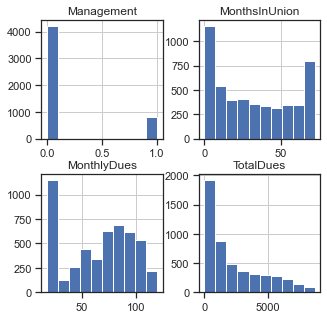

In [114]:
# View the plots of numerical variables including TotalDues

plt.rcParams['figure.figsize']= (5,5) 

test[['Management','MonthsInUnion', 'MonthlyDues','TotalDues']].hist();

<AxesSubplot:>

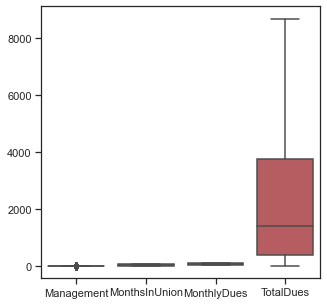

In [115]:
#Let's check outliers presence using boxplots
# Conclusion: There are no outliers. 

sns.boxplot(data = test[['Management','MonthsInUnion', 'MonthlyDues','TotalDues']])

# Data Normalization and Standardization - Test Data Set

* After cleaning the traning data set, I am ready to normalize and standardize the data set so I can prepare data set for PCA.


In [116]:
# Identifying the categorical and numerical variables and shape of data. 

test_data_num = test[['MonthsInUnion','MonthlyDues','TotalDues']]
test_data_cat = test[['Management','gender', 'USAcitizen', 'Married','ContinuingEd', 'FeatureA', 'Connectivity', 'FeatureC', 
                             'FeatureD','FeatureE', 'FeatureF', 'FeatureG', 'FeatureB', 'DuesFrequency','PaperlessBilling',
                             'PaymentMethod']]


print("Numerical Feature  Shape:     "+ str(test_data_num.shape))
print("Categorical Feature  Shape:   "+ str(test_data_cat.shape))

Numerical Feature  Shape:     (5000, 3)
Categorical Feature  Shape:   (5000, 16)


In [117]:
# View the first few rows of dataframe

test_data_cat.head()

,Management,gender,USAcitizen,Married,ContinuingEd,FeatureA,Connectivity,FeatureC,FeatureD,FeatureE,FeatureF,FeatureG,FeatureB,DuesFrequency,PaperlessBilling,PaymentMethod
0,0,Male,Yes,No,No,Maryville,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,0,Female,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,0,Female,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,0,Female,No,No,No,Maryville,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,0,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [118]:
# I am using the get_dummies for data manipulation in order to convert categorical data into dummy or indicator variables.View the first 5 rows of dataframe

test_data_enc = pd.get_dummies(test_data_cat)
test_data_enc.head(5)
test_data_enc.dtypes

Management                                 int64
gender_Female                              uint8
gender_Male                                uint8
USAcitizen_No                              uint8
USAcitizen_Yes                             uint8
Married_No                                 uint8
Married_Yes                                uint8
ContinuingEd_No                            uint8
ContinuingEd_Yes                           uint8
FeatureA_Maryville                         uint8
FeatureA_No                                uint8
FeatureA_Yes                               uint8
Connectivity_DSL                           uint8
Connectivity_Dial-in                       uint8
Connectivity_Fiber optic                   uint8
Connectivity_other                         uint8
FeatureC_Maryville                         uint8
FeatureC_No                                uint8
FeatureC_Yes                               uint8
FeatureD_Maryville                         uint8
FeatureD_No         

In [119]:
# To standardize the data values into a standard format

test_data_num2 = StandardScaler().fit_transform(test_data_num)

print("Encoded Feature Array Shape: " + str(test_data_num.shape))

#Let's check the mean and standard deviation - we expect this to be close to 0 & 1, respectively.
print(np.mean(test_data_num2), np.std(test_data_num2))

Encoded Feature Array Shape: (5000, 3)
1.1747639897900323e-16 1.0


In [120]:
# Place the variable into a new dataframe

test_data_num3 = pd.DataFrame(test_data_num2)

In [121]:
# View the new dataframe

test_data_num3

,0,1,2
0,-1.268931,-1.154574,-0.988029
1,0.070734,-0.258882,-0.168176
2,-1.228335,-0.358403,-0.953649
3,0.517289,-0.756488,-0.189774
4,-1.228335,0.205551,-0.934254
...,...,...,...
4995,-1.025355,0.338247,-0.757501
4996,0.598481,0.305073,0.539719
4997,-1.228335,-0.656967,-0.959819
4998,1.207420,1.532503,2.107579


In [122]:
# Rename the columns to feature names

test_data_num3 = test_data_num3.rename(columns = {test_data_num3.columns[0]:'MonthsInUnion',
                                 test_data_num3.columns[1]:'MonthlyDues',
                                 test_data_num3.columns[2]:'TotalDues'})

In [123]:
# Let's combine the numerical and categorical datasets

norm_test_data = pd.concat([test_data_num3, test_data_enc], axis = 1)

print("Feature Shape: " + str(norm_test_data.shape))

Feature Shape: (5000, 46)


In [124]:
# View the first few rows of dataframe

norm_test_data.head()

,MonthsInUnion,MonthlyDues,TotalDues,Management,gender_Female,gender_Male,USAcitizen_No,USAcitizen_Yes,Married_No,Married_Yes,...,FeatureB_Yes,DuesFrequency_Month-to-month,DuesFrequency_One year,DuesFrequency_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.268931,-1.154574,-0.988029,0,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0.070734,-0.258882,-0.168176,0,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,-1.228335,-0.358403,-0.953649,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0.517289,-0.756488,-0.189774,0,1,0,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,-1.228335,0.205551,-0.934254,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


# Principal Components Analysis - Test Data Set

In [125]:
# creates instance of PCA 

pca = PCA(n_components=6)
principalComponents_test_data = pca.fit_transform(norm_test_data)

In [126]:
# View the shape

print(principalComponents_test_data.shape)

(5000, 6)


In [127]:
# Create a dataframe with the variable and view the first few rows of dataframe

principalComponents_test_data_Df = pd.DataFrame(data = principalComponents_test_data
             , columns = ['p_c_1', 'p_c_2','p_c_3','p_c_4','p_c_5','p_c_6'])
principalComponents_test_data_Df.head()


,p_c_1,p_c_2,p_c_3,p_c_4,p_c_5,p_c_6
0,-1.277740,-1.637175,1.429934,0.446892,0.734441,-0.761061
1,-0.437883,-0.248442,1.367494,-0.948010,-0.686411,0.339079
2,-1.204700,-1.576680,0.979900,-0.519360,-0.582181,0.040121
3,-0.245427,0.338317,2.276514,-1.419903,-0.678794,0.138865
4,-0.807958,-2.463428,-0.373494,0.075356,0.638322,-0.509921


In [128]:
# View Explained variation per principal components

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.28587408 0.1905378  0.0702627  0.04796558 0.04319088 0.03942554]


In [129]:
# Sum the Explained variation per principal components values

np.sum(np.array([0.28587408, 0.1905378, 0.07026255, 0.0479683, 0.04318812, 0.03943095]))


0.6772618

In [130]:
# Screeplot of PCA - Test Data Set

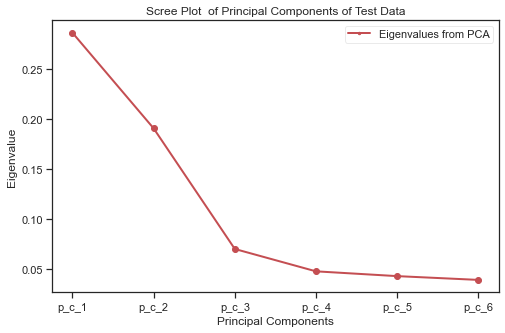

In [131]:
# The scree plot displays the variance explained by each principal component within the analysis

fig = plt.figure(figsize=(8,5))
plt.plot(principalComponents_test_data_Df.columns, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalue') 
plt.title('Scree Plot  of Principal Components of Test Data')
leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3, 
                 shadow=False,markerscale=0.4)
leg.get_frame().set_alpha(0.4)
plt.show()

In [132]:
# In this data set, there are not variables with identical principal components so I will keep all the variables

df_compt = pd.DataFrame(pca.components_,index=list(['component 0', 'component 1', 'component 2',
                                                  'component 3','component 4','component 5']))
components = df_compt.sort_values(by ='component 0', axis=1,ascending=False).round(decimals=6)
components
components.transpose()

,component 0,component 1,component 2,component 3,component 4,component 5
1,0.490230,-0.211891,-0.257141,0.045637,0.019369,0.201299
2,0.482854,0.267719,-0.030809,-0.089749,-0.024285,-0.086178
0,0.331412,0.474361,0.126240,-0.073502,-0.057311,-0.372673
36,0.171535,-0.003526,-0.113281,-0.058815,0.016065,0.282183
33,0.170537,-0.001583,-0.113868,-0.023508,0.016962,0.291713
17,0.152573,-0.133912,-0.292638,0.110988,-0.015521,-0.080900
27,0.152470,0.039086,0.031103,-0.101697,0.018291,0.223781
24,0.144164,0.031322,0.074295,-0.072574,0.016466,-0.004787
14,0.141343,0.024165,-0.150525,0.044710,-0.006255,-0.258754
30,0.112337,0.052205,0.159859,-0.126161,0.032566,0.240676


In [133]:
##Exclude: 19, 22, 25, 28, 31, and 34
# In the next step we will remove all but one

norm_test_data.iloc[:, [13, 19, 22, 25, 28, 31, 34]].head()

,FeatureA_No,FeatureC_Maryville,FeatureD_Maryville,FeatureE_Maryville,FeatureF_Maryville,FeatureG_Maryville,FeatureB_Maryville
0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [134]:
#Let's drop the correlated variables

# The dataframe (X_test_final) created below is going to be your final predictors.
#Recall, your target variable is: y1 = train_data[['LeftUnion']]

X_test_final = norm_test_data.drop(['FeatureA_No','FeatureC_Maryville',
                                      'FeatureD_Maryville',
                                      'FeatureE_Maryville',
                                      'FeatureF_Maryville',
                                      'FeatureG_Maryville'], axis = 1)
X_test_final.head()

,MonthsInUnion,MonthlyDues,TotalDues,Management,gender_Female,gender_Male,USAcitizen_No,USAcitizen_Yes,Married_No,Married_Yes,...,FeatureB_Yes,DuesFrequency_Month-to-month,DuesFrequency_One year,DuesFrequency_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.268931,-1.154574,-0.988029,0,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0.070734,-0.258882,-0.168176,0,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,-1.228335,-0.358403,-0.953649,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0.517289,-0.756488,-0.189774,0,1,0,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,-1.228335,0.205551,-0.934254,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


## Correlation and HeatMap of Test Data Set Features

In [135]:
# prints data that will be plotted 
# columns shown here are selected by corr() since 
# they are ideal for the plot 
print(X_test_final.corr()) 
correlation_matrix = X_test_final.corr().round(2)
  


                                         MonthsInUnion  MonthlyDues  \
MonthsInUnion                                 1.000000     0.244573   
MonthlyDues                                   0.244573     1.000000   
TotalDues                                     0.824828     0.649471   
Management                                    0.010274     0.219668   
gender_Female                                 0.010272    -0.016867   
gender_Male                                  -0.010272     0.016867   
USAcitizen_No                                -0.396598    -0.095025   
USAcitizen_Yes                                0.396598     0.095025   
Married_No                                   -0.164696     0.108779   
Married_Yes                                   0.164696    -0.108779   
ContinuingEd_No                              -0.012084    -0.238785   
ContinuingEd_Yes                              0.012084     0.238785   
FeatureA_Maryville                           -0.012084    -0.238785   
Featur

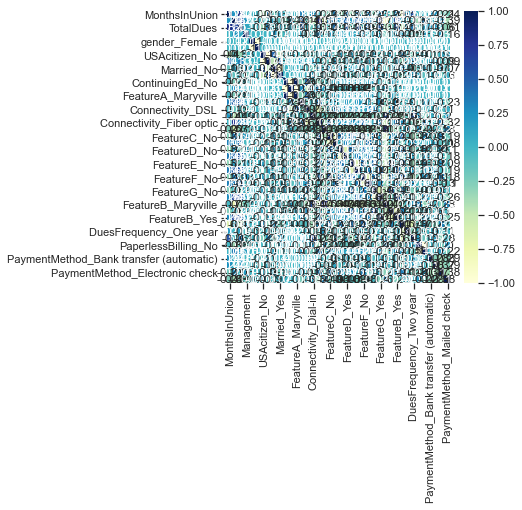

In [136]:
# plotting correlation heatmap 
dataplot = sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True) 
  
# displaying heatmap 
plt.show() 

#how to interpret the data
#Correlation summarizes the strength and direction of the linear (straight-line) association between two quantitative variables. Denoted by r, it takes values between -1 and +1. A positive value for r indicates a positive association, and a negative value for r indicates a negative association.
#The closer r is to 1 the closer the data points fall to a straight line, thus, the linear association is stronger. The closer r is to 0, making the linear association weaker.

#Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. The diagonals are all 1/dark green because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color the higher the correlation between the two variables. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.

# Modelling For Test Data Set


In [137]:
#option 1 
final_predict = X_test_final
XT2_train = final_predict

XT2_train.shape

(5000, 40)

In [ ]:
lrpred.shape

In [ ]:
lrpred.dtype

In [ ]:
lrpred_df = pd.DataFrame(lrpred)
lrpred_df

In [ ]:
lrpred_df.to_csv (r'..\MACHINE LEARNING\Extra Credit Competition Data Set\Python coding\predictions_logreg_Py3.csv', index = False, header=True)

# Decision Tree Model


In [ ]:
dtpred = clf.predict(XT2_train)


In [ ]:
dtpred_df = pd.DataFrame(dtpred)
dtpred_df

In [ ]:
dtpred_df.to_csv (r'..\MACHINE LEARNING\Extra Credit Competition Data Set\Python coding\predictions_decisiontrees_Py3.csv', index = False, header=True)

# Random Forest Model

In [ ]:
# Create a list of feature names
feat_labels = ['MonthsInUnion', 'TotalDues', 'Connectivity_Fiber optic', 'FeatureC_No',
       'FeatureF_No', 'DuesFrequency_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Electronic check']

In [ ]:
# Print the name and gini importance of each feature
for feature in zip(feat_labels, rfclf.feature_importances_):
    print(feature)

In [ ]:
#Identify and select the most important features
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])


In [ ]:
# Apply The Full Featured Classifier To The Test Data
rfpred = rfclf.predict(XT2_train)

In [ ]:
rfpred_df = pd.DataFrame(rfpred)
rfpred_df

In [ ]:
rfpred_df.to_csv (r'..\MACHINE LEARNING\Extra Credit Competition Data Set\Python coding\predictions_randomforest_Py3.csv', index = False, header=True)

# Support Vector Machine Model

In [ ]:
predictions = svc_model.predict(XT2_train)
predictions